# Expériences/Tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from base import *

## Régression linéaire

In [2]:
np.random.seed(0)

In [3]:
# Sample data
X = np.random.randn(10, 3)  # 10 examples, 3 features each
y = np.random.randn(10, 2)  # 10 examples, 2 targets each

In [4]:
# Parameters
n_iterations = 10
gradient_step = 0.01

In [5]:
# Initialize model
linear = Linear(3, 2)
mse_loss = MSELoss()

In [6]:
# Descent gradient
loss_history = np.zeros(n_iterations)

for i in range(n_iterations):
    # Forward pass
    yhat = linear.forward(X)
    loss = mse_loss.forward(y, yhat)
    loss_history[i] = loss.mean()
    
    # Backward pass
    delta = mse_loss.backward(y, yhat)
    
    linear.zero_grad()
    linear.backward_update_gradient(X, delta)
    linear.update_parameters(gradient_step)

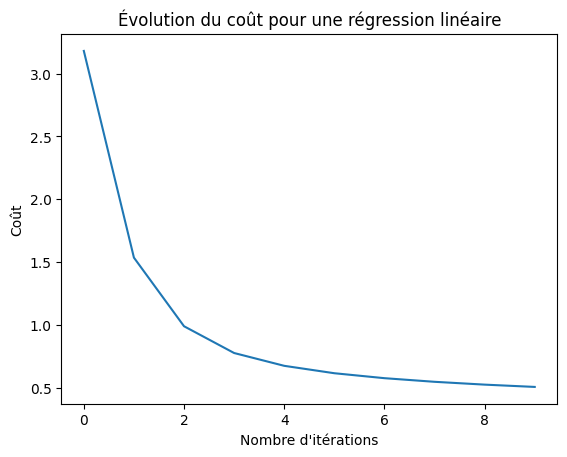

In [7]:
plt.plot(range(n_iterations), loss_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Évolution du coût pour une régression linéaire")
plt.show()

## Réseau à 2 couches avec tanh entre les 2 couches et sigmoide à la sortie

In [8]:
np.random.seed(0)

In [9]:
# Sample data for binary classification
X = np.random.randn(10, 3)  # 10 examples, 3 features each
y = np.where(np.random.rand(10, 2) > 0.5, 1, 0)  # 10 examples, 2 targets : Binary targets (0 or 1)

In [10]:
# Initialize the layers
hidden_dim = 5

layer1 = Linear(3, hidden_dim)
tanh = TanH()
layer2 = Linear(hidden_dim, 2)
sigmoid = Sigmoide()
loss_fn = MSELoss()

In [11]:
# Training parameters
num_epochs = 1000
learning_rate = 0.01

In [12]:
loss_history = np.zeros(num_epochs//100)

for epoch in range(num_epochs):
    # Forward pass
    output1 = layer1.forward(X)
    output2 = tanh.forward(output1)
    output3 = layer2.forward(output2)
    yhat = sigmoid.forward(output3)
    loss = loss_fn.forward(y, yhat)

    # Backward pass
    delta3 = loss_fn.backward(y, yhat)
    delta2 = sigmoid.backward_delta(output3, delta3)
    delta1 = layer2.backward_delta(output2, delta2)
    layer2.backward_update_gradient(output2, delta2)
    delta0 = tanh.backward_delta(output1, delta1)
    layer1.backward_update_gradient(X, delta0)

    # Update parameters
    layer1.update_parameters(learning_rate)
    layer2.update_parameters(learning_rate)

    if epoch % 100 == 0:
        loss_history[epoch//100] = loss.mean()

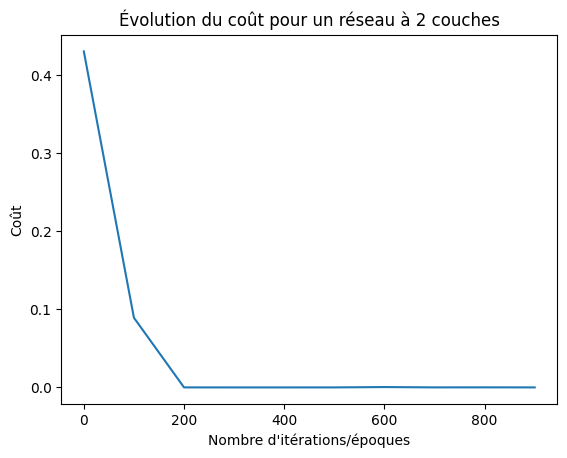

In [13]:
plt.plot([i*100 for i in range(10)], loss_history)
plt.xlabel("Nombre d'itérations/époques")
plt.ylabel("Coût")
plt.title("Évolution du coût pour un réseau à 2 couches")
plt.show()

## Utilisation des classes Sequentiel, Optim, et de la fonction SGD

In [14]:
np.random.seed(0)

In [15]:
# Sample data for binary classification
X = np.random.randn(10, 3)  # 10 examples, 3 features each
y = np.where(np.random.rand(10, 2) > 0.5, 1, 0)  # 10 examples, 2 targets : Binary targets (0 or 1)

In [16]:
# Initialize the network
hidden_dim = 5

net = Sequentiel()
net.add_module(Linear(3, hidden_dim))
net.add_module(TanH())
net.add_module(Linear(hidden_dim, 2))
net.add_module(Sigmoide())

loss_fn = MSELoss()

In [17]:
# Training parameters
num_epochs = 1000
learning_rate = 0.01
batch_size = 25
milestone = 100

In [18]:
loss_history = SGD(net, loss_fn, X, y, batch_size, num_epochs, learning_rate, milestone)

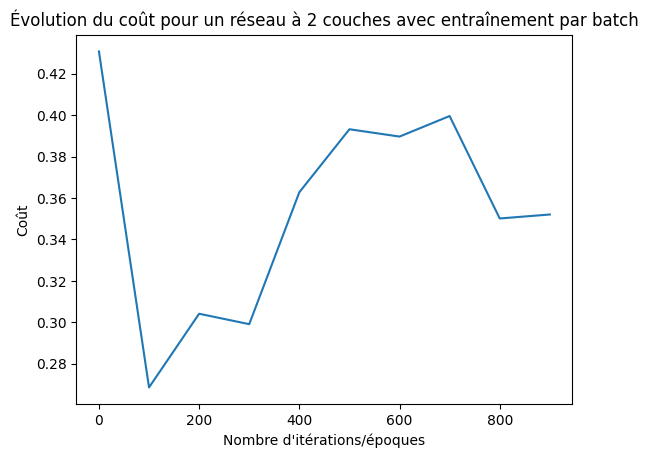

In [19]:
plt.plot([i*milestone for i in range(num_epochs//milestone)], loss_history)
plt.xlabel("Nombre d'itérations/époques")
plt.ylabel("Coût")
plt.title("Évolution du coût pour un réseau à 2 couches avec entraînement par batch")
plt.show()